# Google Cloud Platform - Using Machine Learning APIs  ).

This is an upgraded Python revision of [this notebook](https://github.com/GoogleCloudPlatform/training-data-analyst/blob/master/CPB100/lab4c/mlapis.ipynb).

This notebook originally was being processed using DataLab on the Google Cloud Platform.  This particular incarnation of the notebook is for running on Google Colaboratory which I am trying out for the first time.

### Security

First things first - we need to authenticate against the Google Cloud APIs.

#### Getting a Google API Credential.

First, visit <a href="http://console.cloud.google.com/apis">API console</a>, choose "Credentials" on the left-hand menu.  Choose "Create Credentials" and generate an API key for your application. You should probably restrict it by IP address to prevent abuse, but for now, just  leave that field blank and delete the API key after trying out this demo.

Then, when you have your key, you will enter it in this first executable cell:

In [1]:
!pip install -q cloudstorage
!pip install -q webapp2
!pip install --upgrade numpy
!pip install six==1.10.0
!pip install -q datalab
!pip install --upgrade gcs-client
!pip install --upgrade google-cloud-storage
!pip install --upgrade google-api-python-client
!pip install opencv-python
!pip install gcsfs


normality 0.6.1 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
dataset 1.1.0 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
datalab 1.1.4 has requirement oauth2client>=2.2.0, but you'll have oauth2client 1.5.2 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
normality 0.6.1 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
dataset 1.1.0 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
datalab 1.1.4 has requirement oauth2client>=2.2.0, but you'll have oauth2client 1.5.2 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Requirement already up-to-date: numpy in c:\users\clair\appdata\local\conda\conda\envs\py36\lib\site-packages (1.15.4)


normality 0.6.1 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
dataset 1.1.0 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
datalab 1.1.4 has requirement oauth2client>=2.2.0, but you'll have oauth2client 1.5.2 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


normality 0.6.1 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
dataset 1.1.0 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
datalab 1.1.4 has requirement oauth2client>=2.2.0, but you'll have oauth2client 1.5.2 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
normality 0.6.1 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
gcs-client 0.2.2 has requirement oauth2client<2, but you'll have oauth2client 4.1.3 which is incompatible.
dataset 1.1.0 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Requirement already up-to-date: gcs-client in c:\users\clair\appdata\local\conda\conda\envs\py36\lib\site-packages (0.2.2)
Requirement not upgraded as not directly required: requests[security]<3 in c:\users\clair\appdata\local\conda\conda\envs\py36\lib\site-packages (from gcs-client) (2.19.1)
Requirement not upgraded as not directly required: certifi>=2017.4.17 in c:\users\clair\appdata\local\conda\conda\envs\py36\lib\site-packages (from requests[security]<3->gcs-client) (2018.10.15)
Requirement not upgraded as not directly required: chardet<3.1.0,>=3.0.2 in c:\users\clair\appdata\local\conda\conda\envs\py36\lib\site-packages (from requests[security]<3->gcs-client) (3.0.4)
Requirement not upgraded as not directly required: urllib3<1.24,>=1.21.1 in c:\users\clair\appdata\local\conda\conda\envs\py36\lib\site-packages (from requests[security]<3->gcs-client) (1.23)
Requirement not upgraded as not directly required: idna<2.8,>=2.5 in c:\users\clair\appdata\local\conda\conda\envs\py36\lib\si

normality 0.6.1 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
dataset 1.1.0 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
datalab 1.1.4 has requirement oauth2client>=2.2.0, but you'll have oauth2client 1.5.2 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Requirement already up-to-date: google-cloud-storage in c:\users\clair\appdata\local\conda\conda\envs\py36\lib\site-packages (1.13.0)
Requirement not upgraded as not directly required: google-api-core<2.0.0dev,>=0.1.1 in c:\users\clair\appdata\local\conda\conda\envs\py36\lib\site-packages (from google-cloud-storage) (1.5.2)
Requirement not upgraded as not directly required: google-resumable-media>=0.3.1 in c:\users\clair\appdata\local\conda\conda\envs\py36\lib\site-packages (from google-cloud-storage) (0.3.1)
Requirement not upgraded as not directly required: google-cloud-core<0.29dev,>=0.28.0 in c:\users\clair\appdata\local\conda\conda\envs\py36\lib\site-packages (from google-cloud-storage) (0.28.1)
Requirement not upgraded as not directly required: six>=1.10.0 in c:\users\clair\appdata\local\conda\conda\envs\py36\lib\site-packages (from google-api-core<2.0.0dev,>=0.1.1->google-cloud-storage) (1.10.0)
Requirement not upgraded as not directly required: protobuf>=3.4.0 in c:\users\clair

normality 0.6.1 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
dataset 1.1.0 has requirement six>=1.11.0, but you'll have six 1.10.0 which is incompatible.
datalab 1.1.4 has requirement oauth2client>=2.2.0, but you'll have oauth2client 1.5.2 which is incompatible.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [1]:
BUCKET='wpiopenimageskaggle'
GOOGLE_APPLICATION_CREDENTIALS="C:\\WPI\\MachineLearning\\FinalProject_Local\\MLRobustClassifier-cce4ed8673de.json"

In [20]:
import sys
import json
import argparse
import googleapiclient.discovery
import pandas as pd
import skimage.data
from skimage import img_as_float
import numpy as np
import pandas as pd
import os
import sys
import tensorflow as tf
import zipfile
import cv2

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
%matplotlib inline
import io
from google.cloud import storage

In [3]:
def create_service():

    client = storage.Client.from_service_account_json(
        GOOGLE_APPLICATION_CREDENTIALS)
    
    return client



In [70]:
def list_bucket(client):    
    bucket = client.get_bucket(BUCKET)
    blobs = bucket.list_blobs()
    files=[]
    for blob in blobs:
        files.append(blob.name)
    return files



In [69]:
def list_blobs_with_prefix(client,bucket_name, prefix, delimiter=None):
    
    """Lists all the blobs in the bucket that begin with the prefix.

    This can be used to list all blobs in a "folder", e.g. "public/".

    The delimiter argument can be used to restrict the results to only the
    "files" in the given "folder". Without the delimiter, the entire tree under
    the prefix is returned. For example, given these blobs:

        /a/1.txt
        /a/b/2.txt

    If you just specify prefix = '/a', you'll get back:

        /a/1.txt
        /a/b/2.txt

    However, if you specify prefix='/a' and delimiter='/', you'll get back:

        /a/1.txt

    """

    bucket = client.get_bucket(bucket_name)

    blobs = bucket.list_blobs(prefix=prefix, delimiter=delimiter)

    if delimiter:
        print('Prefixes:')
        for prefix in blobs.prefixes:
            print(prefix)
    files=[]
    for blob in blobs:
        files.append(blob.name)
    return files
    

In [71]:
def plot_image(filename):
    client = storage.Client.from_service_account_json(
        GOOGLE_APPLICATION_CREDENTIALS)
    bucket = client.get_bucket(BUCKET)
    blob = storage.Blob(test_file, bucket)
    content = blob.download_as_string()
    img = Image.open(io.BytesIO(content))
    import matplotlib.pyplot as plt

    plt.imshow(img)
    plt.show()

In [86]:
def create_minibatch(client,BUCKET):
    objs=['Table', 'Tree', 'Person', 'Boat']
    groups=[]
    for obj in objs:
        print(obj)
        res=list_blobs_with_prefix(client,BUCKET, obj, delimiter=None)
        groups.append(res)
    mini_batch=[]
    for i in range(0, len(objs)):
        for j in range(0,1000):
            mini_batch.append(groups[i][j])
    return mini_batch
    

In [121]:
def strip_filepath(infiles):
    strip=[]
    for path in infiles:
        res=path.split("/")
        res=res[1]
        res=res.split('.')
        res=res[0]
        strip.append(res)
    files=pd.DataFrame()
    files['ImageID']=strip
    files['Url']=infiles
    return(files)

In [163]:
def download_content(file):
    client = storage.Client.from_service_account_json(
    GOOGLE_APPLICATION_CREDENTIALS)
    bucket = client.get_bucket(BUCKET)
    blob = storage.Blob(test_file, bucket)
    content = blob.download_as_string()
    return(content)

# METHODS ALL ABOVE THIS POINT

## Create dataframe of images for minibatch

#### Import mini-batch urls based on bucket name

In [123]:
mini_batch=create_minibatch(client,BUCKET)

Table
Tree
Person
Boat


### Extact imageid from url and create DF with url and imageid

In [125]:
image_info=strip_filepath(mini_batch)

Table/00108e3a60a46128.jpg


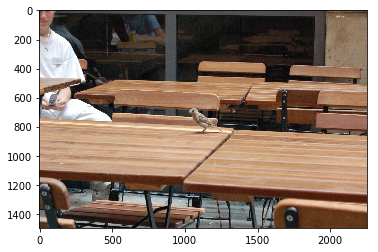

Table/00183df6ffe09093.jpg


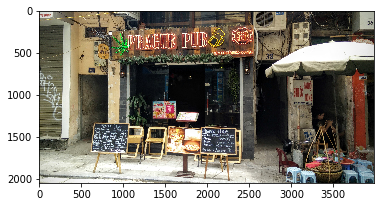

Table/00577e58c62f30f0.jpg


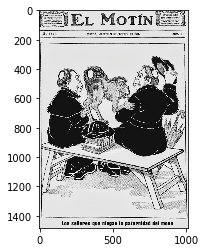

Table/0078c798538a29af.jpg


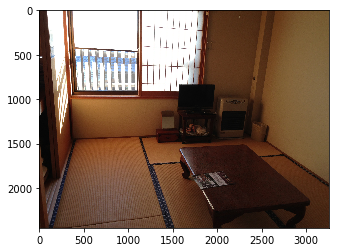

Table/00b9bbe6f3810cad.jpg


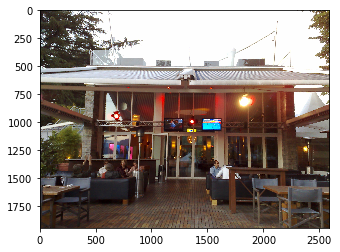

Table/00fb47a3a3de737e.jpg


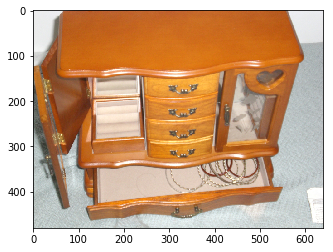

Table/0116b69b0eaedaaf.jpg


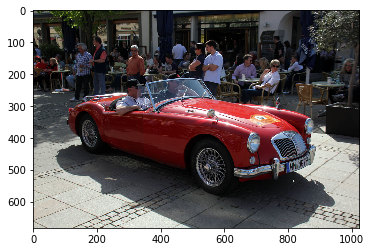

Table/0117a947bc5c1ad3.jpg


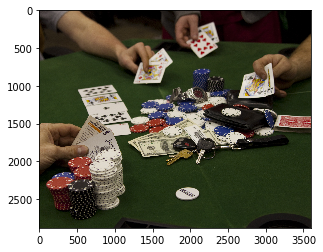

Table/01f118711ba15c0a.jpg


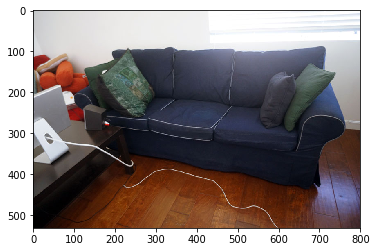

In [83]:
for id in range(1,10):
  test_file=mini_batch[id]
  print(test_file)
  plot_image(test_file)
  

***BELOW THIS POINT IS CODE TRIED THAT DOESN'T WORK KEPT FOR REFERENCE***

In [ ]:
def build_master_df():
    BBOX='C:\\WPI\\MachineLearning\\FinalProject_Local\\bbox_test.csv'
    
    #THESE FUNCTIONS ARE USED TO ESTABLISH CONNECTION WITH GCP AND EXTRACT ARRAY OF ALL IMAGES
    create_service()
    files=list_bucket(BUCKET)
    
    #STRIP THE PATH INFO PROVIDED TO DETERMINE OPENIMAGES IMAGEID
    imageid=strip_filepath(files)
    files['ImageID']=imageid
    
    #READ IN BOUNDING BOX
    bbox=pd.read_csv(BBOX)
    
    #MERGE LIST OF ALL FILES WITH BOUNDING BOX INFORMATION
    df_all = pd.merge(files, bbox, on='ImageID', how='right')
    return(df_all)